# Exercise 02: Bar

In [66]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Create a graph

In [67]:
db_path = "../data/checking-logs.sqlite"
conn = sqlite3.connect(db_path)

- Analyze only the users, not the admins.
- The font size and fig size are still the same.
- Night is from 0:00:00 to 03:59:59, morning is from 04:00:00 to 09:59:59, afternoon is from 10:00:00 to 16:59:59, and evening is from 17:00:00 to 23:59:59.

<Figure size 1500x800 with 0 Axes>

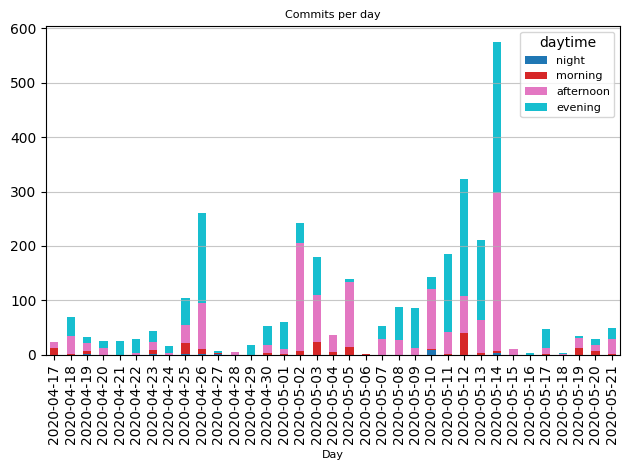

In [68]:
users_df = pd.read_sql_query("SELECT * FROM checker", conn)
users_df = users_df.dropna(subset=['uid'])
users_df = users_df[users_df['uid'].str.contains('user', na=False)].copy()
conn.close()


users_df['datetime'] = pd.to_datetime(users_df['timestamp'], errors='coerce')
users_df = users_df.dropna(subset=['datetime'])

def get_time_of_day(hour):
    if 0 <= hour < 4:
        return 'night'
    elif 4 <= hour < 10:
        return 'morning'
    elif 10 <= hour < 17:
        return 'afternoon'
    else:
        return 'evening'

users_df['date'] = users_df['datetime'].dt.date
users_df['time_of_day'] = users_df['datetime'].dt.hour.apply(get_time_of_day)

time_order = ['night', 'morning', 'afternoon', 'evening']
pivot_df = users_df.pivot_table(
    index='date',
    columns='time_of_day',
    values='uid',
    aggfunc='count',
    fill_value=0
)
for col in time_order:
    if col not in pivot_df.columns:
        pivot_df[col] = 0
pivot_df = pivot_df[time_order]

# График
plt.figure(figsize=(15, 8))

colormap = plt.get_cmap('tab10', len(pivot_df.columns))
colors = [colormap(i) for i in range(len(pivot_df.columns))]

pivot_df.plot(kind='bar', stacked=True, color=colors)
plt.title('Commits per day', fontsize=8)
plt.xlabel('Day', fontsize=8)
plt.legend(title='daytime', fontsize=8)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

In [69]:
total_by_time = users_df['time_of_day'].value_counts()
most_common_periods = total_by_time.head(2).index.tolist()
target_day = None
max_commits = 0

for day in pivot_df.index:
    total = pivot_df.loc[day].sum()
    if pivot_df.loc[day, 'evening'] > pivot_df.loc[day, 'afternoon'] and total > max_commits:
        max_commits = total
        target_day = day

daily_totals = pivot_df.sum(axis=1)
target_day = daily_totals.idxmax()
max_commits = daily_totals.max()

In [70]:
daily_totals

date
2020-04-17     23
2020-04-18     69
2020-04-19     33
2020-04-20     25
2020-04-21     25
2020-04-22     28
2020-04-23     43
2020-04-24     16
2020-04-25    104
2020-04-26    261
2020-04-27      6
2020-04-28      5
2020-04-29     17
2020-04-30     53
2020-05-01     60
2020-05-02    242
2020-05-03    180
2020-05-04     37
2020-05-05    139
2020-05-06      2
2020-05-07     52
2020-05-08     87
2020-05-09     86
2020-05-10    143
2020-05-11    186
2020-05-12    323
2020-05-13    211
2020-05-14    575
2020-05-15     10
2020-05-16      4
2020-05-17     48
2020-05-18      3
2020-05-19     34
2020-05-20     28
2020-05-21     49
dtype: int64

In [71]:
target_day

datetime.date(2020, 5, 14)

In [72]:
max_commits

np.int64(575)

In [73]:
total_by_time

time_of_day
evening      1611
afternoon    1391
morning       184
night          21
Name: count, dtype: int64

## At the end of your Jupyter notebook, create a Markdown cell and insert the following questions: 
- When do our users usually commit to the labs: in the night, morning, afternoon, or evening? The answer is the two most common periods.
- Which day has: 
        - the most number of commits?
        - and at the same time, is the number of commits higher in the evening than in the afternoon?
- |time_of_day
- |evening      1611
- |afternoon    1391
- |morning       184
- |night          21
- |Name: count, dtype: int64
- |Два самых частых периода: ['evening', 'afternoon']

## The answer is the date of that day.
Дата: 2020-05-12
Всего коммитов: 323
Коммитов вечером: 215
Коммитов днем: 68

In [74]:
len(pivot_df)

35